In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from tabulate import tabulate
sns.set(style="ticks", context="talk")
sns.set_style("white")

#plt.style.use("dark_background")
#plt.style.use("fivethirtyeight")
#sns.set_style("white", {'axes.grid' : False})
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
df = pd.read_csv('Mexico_real_estate_rent_listings_2017_2018.csv') 

In [3]:

print(df.shape)
print(tabulate(df.head(),headers = 'keys', tablefmt = 'psql' ))

(362523, 20)
+----+------------------------------------------+--------------+-------------+-----------------+--------------+---------------------------+----------------+--------------+---------+----------+---------+------------+------------------------------+-------------------+-----------------------+--------------------+----------------+---------+------------+-------------------------------------------------+
|    | id                                       | created_on   | operation   | property_type   | place_name   | place_with_parent_names   | country_name   | state_name   |     lat |      lon |   price | currency   |   price_aprox_local_currency |   price_aprox_usd |   surface_total_in_m2 |   price_usd_per_m2 |   price_per_m2 |   rooms |   expenses | title                                           |
|----+------------------------------------------+--------------+-------------+-----------------+--------------+---------------------------+----------------+--------------+---------+--

In [12]:
print(tabulate(df.describe(), headers = 'keys', tablefmt = 'psql' ))

+-------+--------------+--------------+---------------+------------------------------+-------------------+-----------------------+--------------------+------------------+-------------+------------+
|       |          lat |          lon |         price |   price_aprox_local_currency |   price_aprox_usd |   surface_total_in_m2 |   price_usd_per_m2 |     price_per_m2 |       rooms |   expenses |
|-------+--------------+--------------+---------------+------------------------------+-------------------+-----------------------+--------------------+------------------+-------------+------------|
| count | 267835       | 267835       | 348374        |                348374        |         348374    |            194070     |       107778       | 281395           | 12795       |    3578    |
| mean  |     20.9782  |    -98.7058  |  21860        |                 25152.2      |           1359.68 |               273.754 |            7.88071 |    210.044       |     2.63142 |    2449.13 |
| std   | 

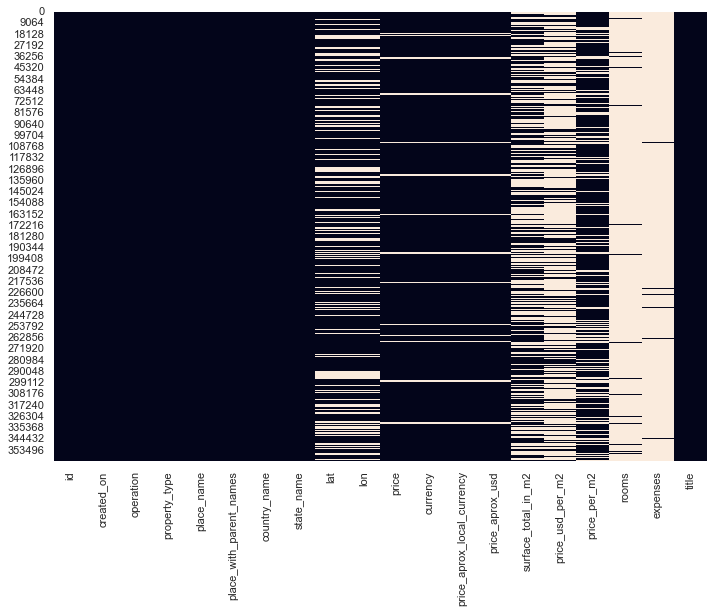

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [10]:
def check_variables(df: pd.DataFrame):
    cols = df.columns
    quantitative_cols = df._get_numeric_data().columns
    categorical_cols = list(set(cols) - set(quantitative_cols))
    return categorical_cols, list(set(quantitative_cols))

In [11]:
cat_cols, quan_cols = check_variables(df)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['country_name', 'title', 'place_with_parent_names', 'property_type', 'currency', 'place_name', 'operation', 'state_name', 'id', 'created_on']
quantitative columns: ['price_per_m2', 'price_aprox_local_currency', 'price_aprox_usd', 'expenses', 'surface_total_in_m2', 'price_usd_per_m2', 'lon', 'rooms', 'price', 'lat']


In [10]:
#  Function to Plot histogram for variables
def histogram_plot(data: np.ndarray, num_bins: int):
    fig, ax = plt.subplots()   
    # fig.set_facecolor('white')
    n, bins, patches = ax.hist(data, num_bins, density=True)
    ax.set_xlabel(data.name)
    ax.set_ylabel('Probability density')
    ax.set_title('Histogram of: %s' %data.name )
    fig.tight_layout()
    
    min_ylim, max_ylim = plt.ylim()
    # MEAN:
    # plt.axvline(data.mean(), color='k', linestyle='dashed', linewidth=1)
    # plt.text(data.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data.mean()))
    # MEDIAN:
    plt.axvline(data.median(), color='k', linestyle='dashed', linewidth=1)    
    plt.text(data.median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(data.median()))    
    plt.show()

In [7]:
    
def mystatsum (dataframe_, field_ ):
   print('Statistical Summary for column: ', field_)
   print('Non-null values: ',dataframe_[field_].count(), 100 * dataframe_[field_].count() / len(dataframe_))
   print('Null values: ',dataframe_[field_].isnull().count(), 100 * dataframe_[field_].isnull().sum() / len(dataframe_))     
   print('Unique values: ',dataframe_[field_].nunique())
   mode = dataframe_[field_].mode()
   mean = dataframe_[field_].mean()
   median = dataframe_[field_].median()

   print('Mean:',mean)
   print('Median:',median)
   # print('Mode:',mode)

   min_ = dataframe_[field_].min()
   max_ = dataframe_[field_].max()
   range_ = max_ - min_
    
   print('Range:',range_)

   Q25 = dataframe_[field_].quantile(0.25)
   Q75 = dataframe_[field_].quantile(0.75)
   IQR = Q75 - Q25

   print('Q25:',Q25)
   print('Q75:',Q75)
   print('IQR:',IQR)

   stddev = dataframe_[field_].std()
   print('Standard Deviation: {:0.2f}'.format(stddev))

   lower_whisker = (Q25 - 1.5*IQR)
   # lof = (Q25 - 3*IQR)
   upper_whisker = (Q75 + 1.5*IQR)
   # uof = (Q75 + 3*IQR)

   _outliers = dataframe_[(dataframe_[field_] < Q25 - 1.5*IQR)|(dataframe_[field_] > Q75 + 1.5*IQR)][field_]
   clean_ = dataframe_[(dataframe_[field_] > Q25 - 1.5*IQR) & (dataframe_[field_] < Q75 + 1.5*IQR)][field_]

   print('Min:',min_)
   print('Lower Whisker: ', lower_whisker)
   print('Median: ',median)
   print('Upper Whisker: ', upper_whisker)
   print('Max:',max_)
   print('Number of Outliers: ', _outliers.value_counts().sum())
   histogram_plot(dataframe_[field_],20)
   #plt.figure(facecolor='white')
   plt.boxplot(x=dataframe_[field_], labels=[field_])
   plt.ylabel(field_)
   plt.show

   histogram_plot(clean_,20)
  # plt.figure(facecolor='white')
   plt.boxplot(x=clean_, labels=[field_])

   # print('\nOutliers:\n ', _outliers.sort_values(ascending=True))

Statistical Summary for column:  price
Non-null values:  348374 96.097075220055
Null values:  362523 3.9029247799449966
Unique values:  3266
Mean: 21859.99112161068
Median: 13500.0
Range: 1890000.0
Q25: 7500.0
Q75: 24000.0
IQR: 16500.0
Standard Deviation: 50475.02
Min: 0.0
Lower Whisker:  -17250.0
Median:  13500.0
Upper Whisker:  48750.0
Max: 1890000.0
Number of Outliers:  25493


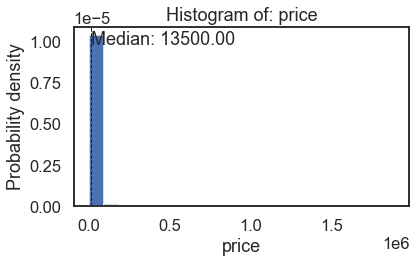

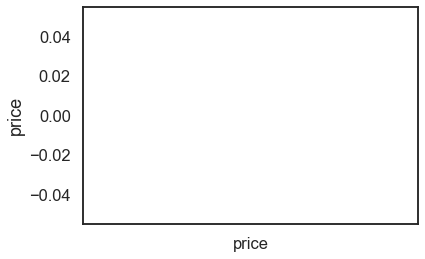

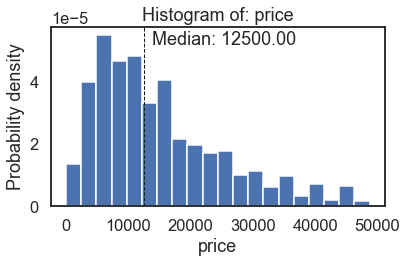

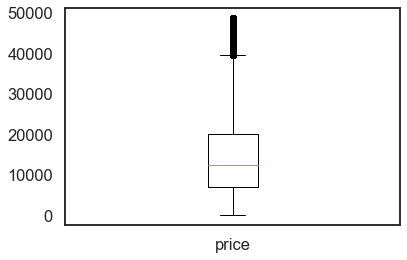

In [11]:
mystatsum(df,'price')

Statistical Summary for column:  price_per_m2
Non-null values:  281395 77.62128196004116
Null values:  362523 22.378718039958844
Unique values:  12578
Mean: 210.04404569954986
Median: 91.66666666666669
Range: 129999.99999602739
Q25: 60.0
Q75: 155.55555555555554
IQR: 95.55555555555554
Standard Deviation: 1482.65
Min: 3.972611113195066e-06
Lower Whisker:  -83.33333333333331
Median:  91.66666666666669
Upper Whisker:  298.88888888888886
Max: 130000.0
Number of Outliers:  18636


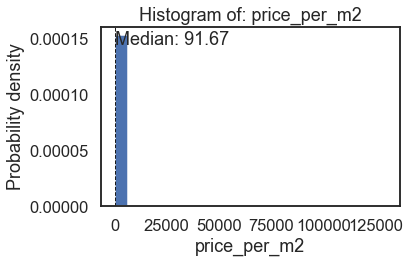

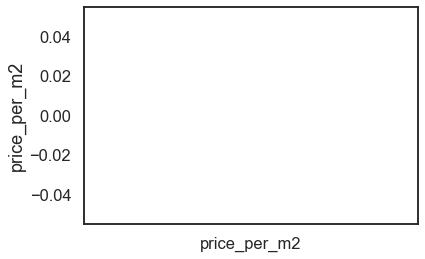

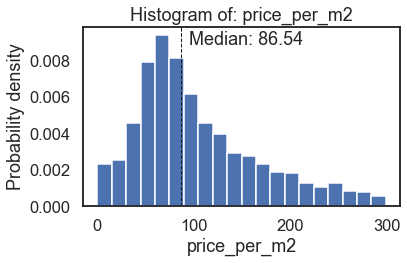

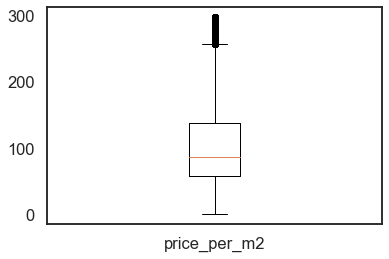

In [12]:
mystatsum(df,'price_per_m2')

In [12]:

def show_boxplots(df, cols, whis=1.5):
    # Create as many horizontal plots as we have columns
    fig, axes = plt.subplots(len(cols), 1, figsize=(10, 2*len(cols)))
    # For each one, plot the non-null data inside it
    for n, col in enumerate(cols):
        data = df[col][df[col].notnull()]
        axes[n].set_title(f'{col} Distribution')
        # Extend whiskers to specified IQR multiplier
        axes[n].boxplot(data, whis=whis, vert=False, sym='x')
        fig.set_facecolor('white')
        axes[n].set_yticks([])
        # Fix spacing of subplots at the end
    fig.tight_layout()


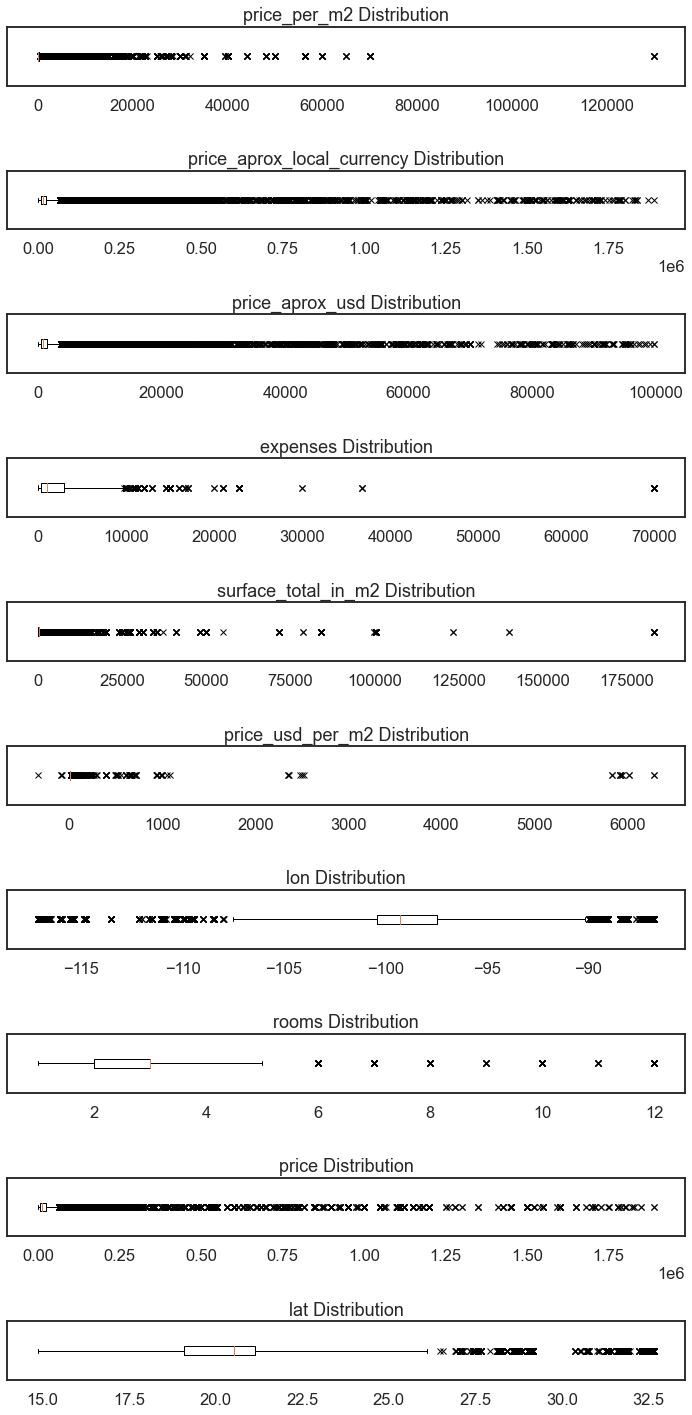

In [13]:
show_boxplots(df, quan_cols, 2.5 )

In [14]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
missing_values_table(df)

Your selected dataframe has 20 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
expenses,358945,99.0
rooms,349728,96.5
price_usd_per_m2,254745,70.3
surface_total_in_m2,168453,46.5
lat,94688,26.1
lon,94688,26.1
price_per_m2,81128,22.4
currency,14232,3.9
price,14149,3.9
price_aprox_local_currency,14149,3.9


In [16]:
def missing_data_column_names(df):
    # Returns column names with missing data  
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the column header
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    delete_columns =  mis_val_table_ren_columns[mis_val_table_ren_columns['% of Total Values'].values > 40]
    col_names = delete_columns.index
    return col_names


col_to_delete = missing_data_column_names(df)
print(col_to_delete)

Index(['surface_total_in_m2', 'price_usd_per_m2', 'rooms', 'expenses'], dtype='object')


In [17]:
# Apply column REMOVE with >40% missing data
# Delete columns with missing values greater than 40% missing

df.drop(col_to_delete, axis = 1, inplace = True)
print("Done")

Done


In [18]:
df.columns

Index(['id', 'created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'price_per_m2', 'title'],
      dtype='object')

In [19]:
 # split column and add new columns to df
df[['blank','country', 'state2', 'district']] = df['place_with_parent_names'].str.split('|', expand=True, n=4).reindex(range(4), axis=1)


In [20]:
# Delete Rows not needed
index_names = df[ df['currency'] == 'USD' ].index  
# drop these row indexesfrom dataFrame
df.drop(index_names, inplace = True) 

In [25]:
print(df.shape)
# Delete price Rows that are  negative
index_names = df[df['price_per_m2'] < 1 ].index  
 # drop these row indexesfrom dataFrame
df.drop(index_names, inplace = True)
print(df['price_per_m2'].min())
print(df.shape)

(347488, 20)
1.0
(347488, 20)


In [26]:
# Delete redundant columns
# delete using a loop
columns_selected   =['operation','country_name','title','id', 'blank',
                     'place_with_parent_names', 'state2', 'country', 'currency']

for col in df.columns:
    if col in columns_selected:
        del df[col]
print('Done')

Done


---------------------------------------------------------------------------------------------------------
#Replace null values in price_per_m2 with MEDIAN as calculated per location place_name

In [27]:
print('Non-nulls: ', df['price_per_m2'].count())
print('Nulls:', df['price_per_m2'].isnull().sum())

Non-nulls:  270664
Nulls: 76824


In [28]:
df['price_per_m2'] = df['price_per_m2'].fillna(df.groupby(['property_type','place_name'])['price_per_m2'].transform('median'))

In [29]:
print('Non-nulls: ', df['price_per_m2'].count())
print('Nulls:', df['price_per_m2'].isnull().sum())

Non-nulls:  342353
Nulls: 5135


In [30]:
df.dropna(subset=['price_per_m2'], axis='index', inplace=True)

In [31]:
print('Non-nulls: ', df['price_per_m2'].count())
print('Nulls:', df['price_per_m2'].isnull().sum())

Non-nulls:  342353
Nulls: 0


------------------------------------------------------------------------------------------------------------------------------
#Outlier Removal
------------------------------------------------------------------------------------------------------------------------------

In [32]:
def iqr_trimming(df, cols, factor):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        s = df[col]
        
        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
    
    return drop_outliers

In [33]:
features = ['price_per_m2', 'price_aprox_usd', 'price', 'price_aprox_local_currency']
df_trim = df.copy()
dropped = np.unique(iqr_trimming(df_trim, features, 2.5))
df_trim.drop(dropped, inplace=True)
print('Original shape: ',df.shape)
print('After outlier removal: ',df_trim.shape)
print('Outlier rows removed: ',len(df) - len(df_trim))
print('Removed as percentage of total : ',(len(df) - len(df_trim)) / len(df_trim))

Original shape:  (342353, 11)
After outlier removal:  (320584, 11)
Outlier rows removed:  21769
Removed as percentage of total :  0.06790419983530058


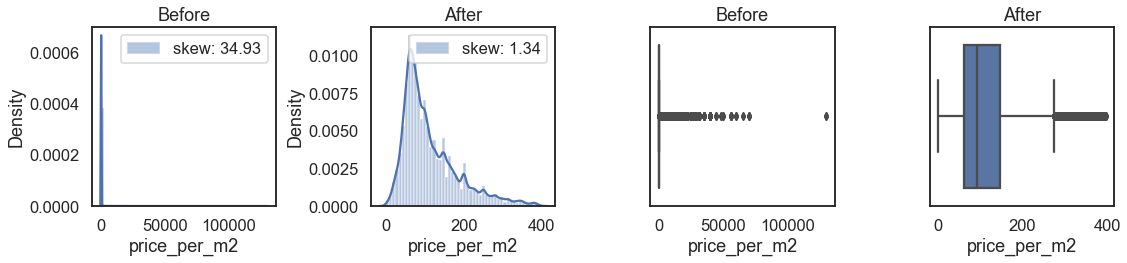

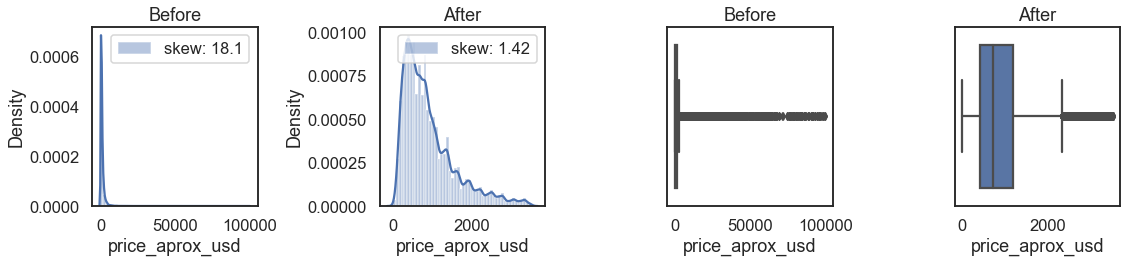

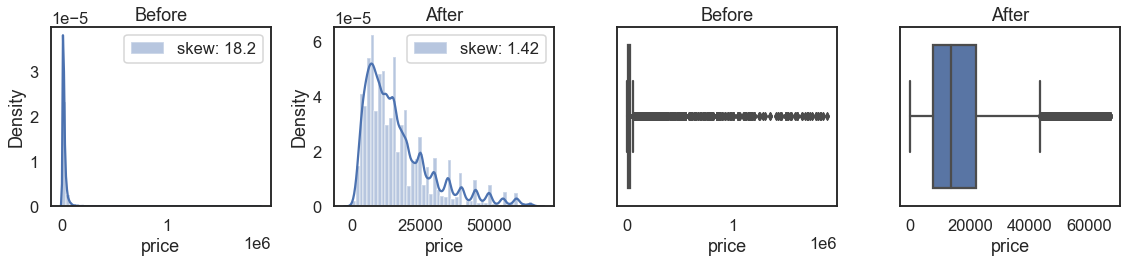

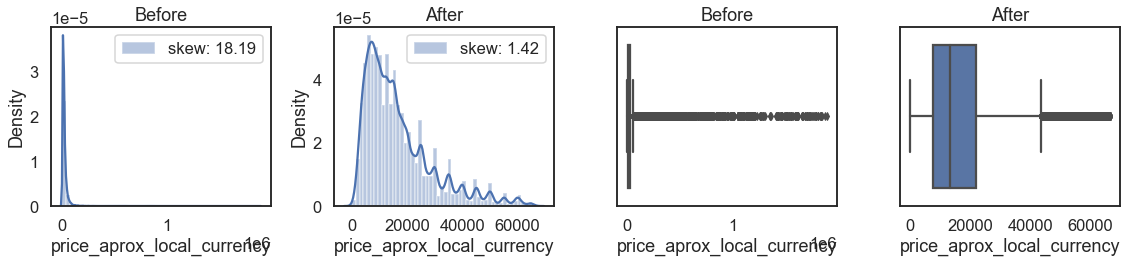

In [34]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_trim[col], label="skew: " + str(np.round(df_trim[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_trim[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [35]:
df.drop(dropped, inplace=True)
df.shape

(320584, 11)

-----------------------------------------------------------------------------------------------------------------------------
# Property by Location e.g. State
------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'All property_type Rent per State')

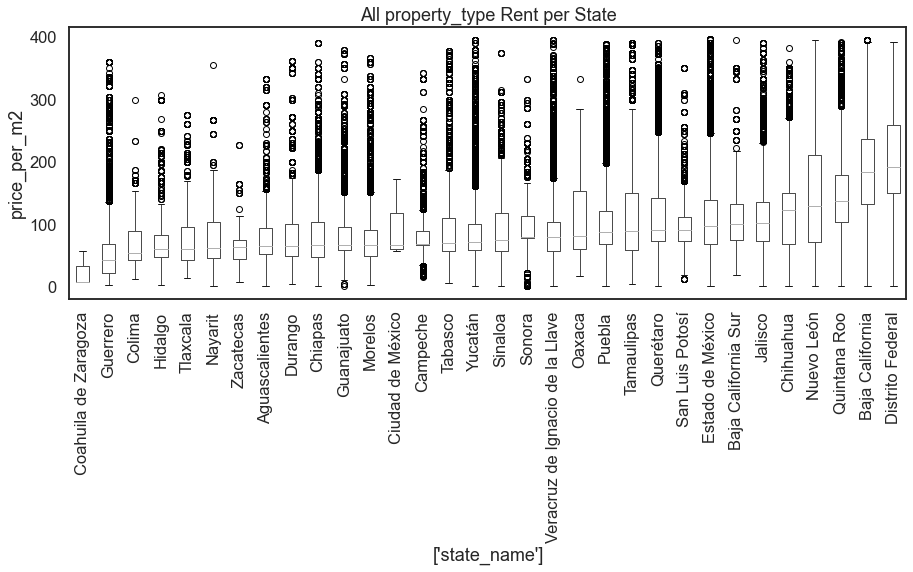

In [37]:

def boxplot_sorted(df, by, column):
  df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df2.median().sort_values()
  ax = df2[meds.index].boxplot(rot=90,figsize=(15,5))
  plt.grid(color='w', linestyle='solid')
  ax.set_ylabel(column)
  ax.set_xlabel(by)

boxplot_sorted(df, by=["state_name"], column="price_per_m2")
plt.title('All property_type Rent per State')

# Conclusion: For all propert types combined Coahulia de Zaragoza has the cheapest median  rent.  Distrito Federal has the highest median rent.

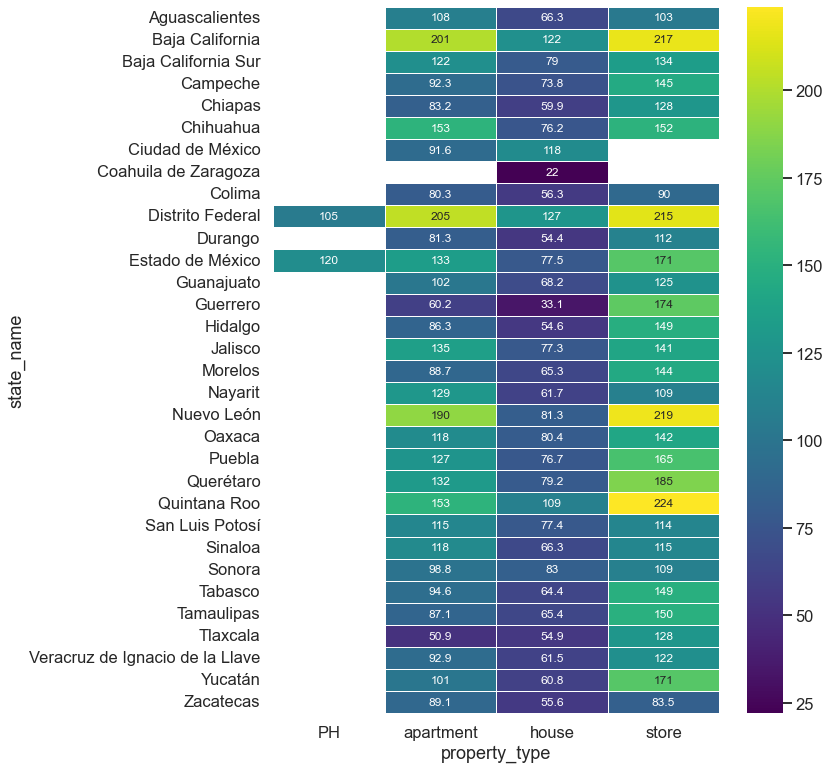

In [39]:
#create pivot table
result = pd.pivot_table(data=df, index='state_name',columns='property_type',values='price_per_m2')
#print(result)
fig, ax = plt.subplots(figsize=(10,13)) 
ax=sns.heatmap(result, annot=True, fmt=".3g", linewidths=0.5,
            annot_kws={"fontsize":12}, cmap="viridis")

plt.show()

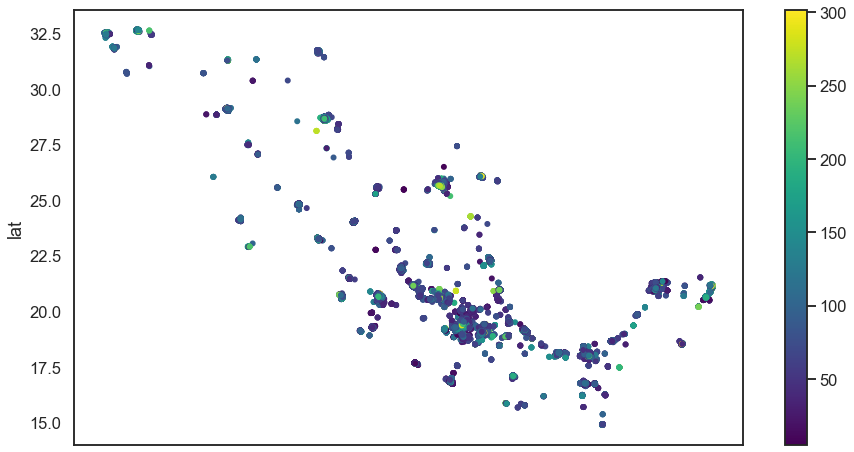

In [5]:

df.plot(kind="scatter", x="lon", y="lat",
             c=df['price_per_m2'], cmap='viridis', figsize=(15,
                                                                 8),)
plt.savefig('mexpricewww.png', dpi=300)

# Conclusion: The adverts are concentrated in certain areas that have cities of higher populations.

In [58]:

def barchart_h(df, col_x, col_y):
    def set_size(w,h, ax=None):
        """ w, h: width, height in inches """
        if not ax: ax=plt.gca()
        l = ax.figure.subplotpars.left
        r = ax.figure.subplotpars.right
        t = ax.figure.subplotpars.top
        b = ax.figure.subplotpars.bottom
        figw = float(w)/(r-l)
        figh = float(h)/(t-b)
        ax.figure.set_size_inches(figw, figh)
    chart_data = df.groupby(col_x)[col_y].median().sort_values().tail(5)
    # print(a)
    fig, ax = plt.subplots()  
    chart_data.plot.barh()
    ax.bar_label(ax.containers[0])
    set_size(5,5)
    # Add title and axis names
    # plt.title(col_x.index, col_y.index)
    # plt.ylabel(col_x.index)
    plt.show()

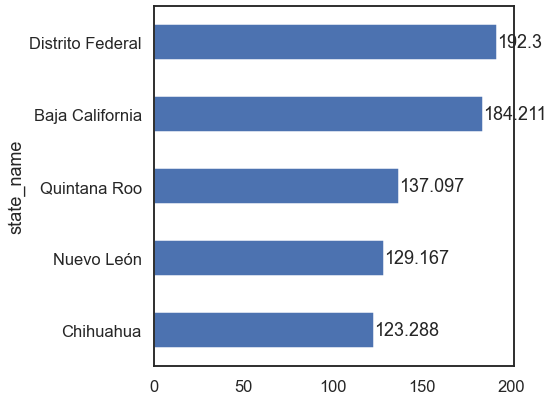

In [59]:
barchart_h(df, 'state_name', 'price_per_m2')

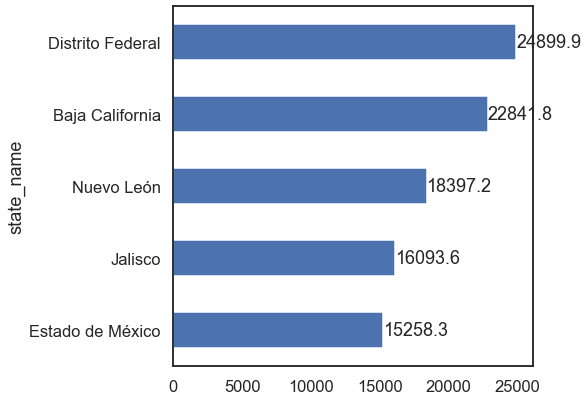

In [60]:
barchart_h(df , 'state_name', 'price_aprox_local_currency')


Text(0.5, 1.0, 'Apartment Rent per State')

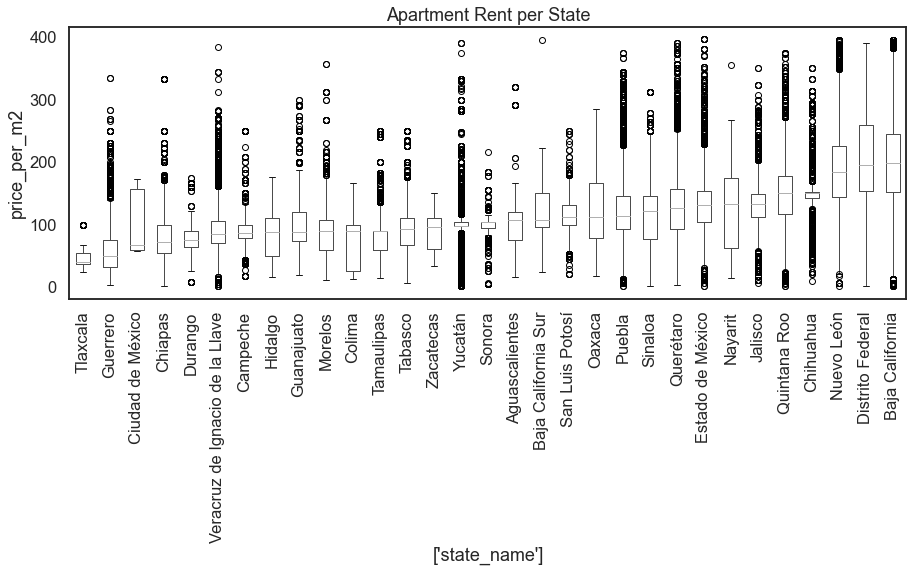

In [46]:
y= df[(df['property_type']=='apartment')]

def boxplot_sorted(df, by, column):
  df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df2.median().sort_values()
  ax = df2[meds.index].boxplot(rot=90,figsize=(15,5))
  plt.grid(color='w', linestyle='solid')
  ax.set_ylabel(column)
  ax.set_xlabel(by)

boxplot_sorted(y, by=["state_name"], column="price_per_m2")
plt.title('Apartment Rent per State')

#Conclusion: Tlaxcala has the cheapest median apartment rent. Baja California has the highest median apartment rent.

Text(0.5, 1.0, 'House Rent per State')

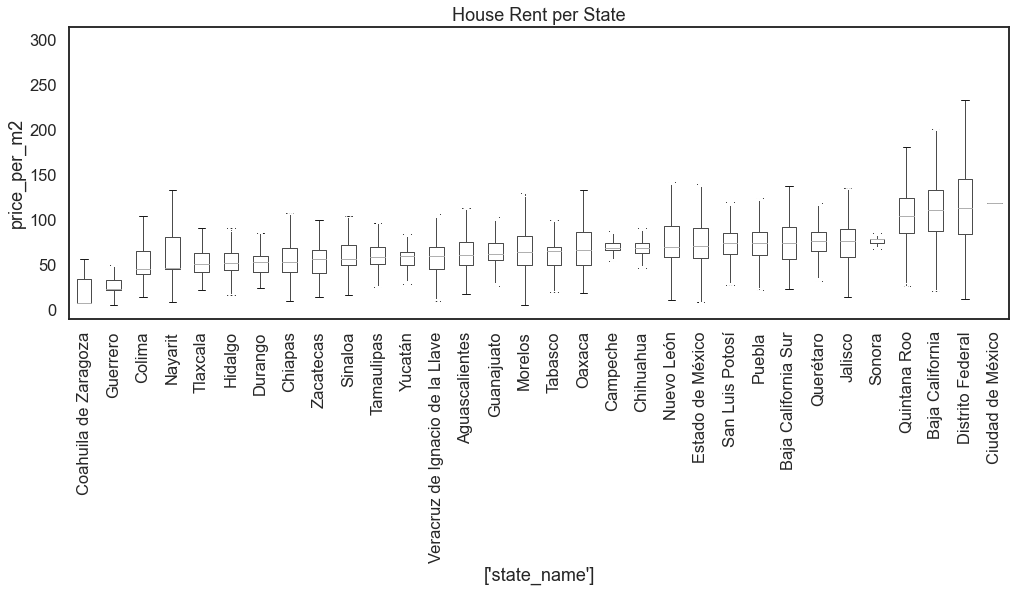

In [52]:
y= df[(df['property_type']=='house')]

def boxplot_sorted(df, by, column):
  df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df2.median().sort_values()
  ax = df2[meds.index].boxplot(rot=90,figsize=(15,5))
  plt.grid(color='w', linestyle='solid')
  ax.set_ylabel(column)
  ax.set_xlabel(by)

boxplot_sorted(y, by=["state_name"], column="price_per_m2")
plt.title('House Rent per State')

#Conclusion: Cohuila de Zaragosa has the cheapest median HOUSE rent. Ciudad de Mexico has the highest median HOUSE rent.

Text(0.5, 1.0, 'Store Rent per State')

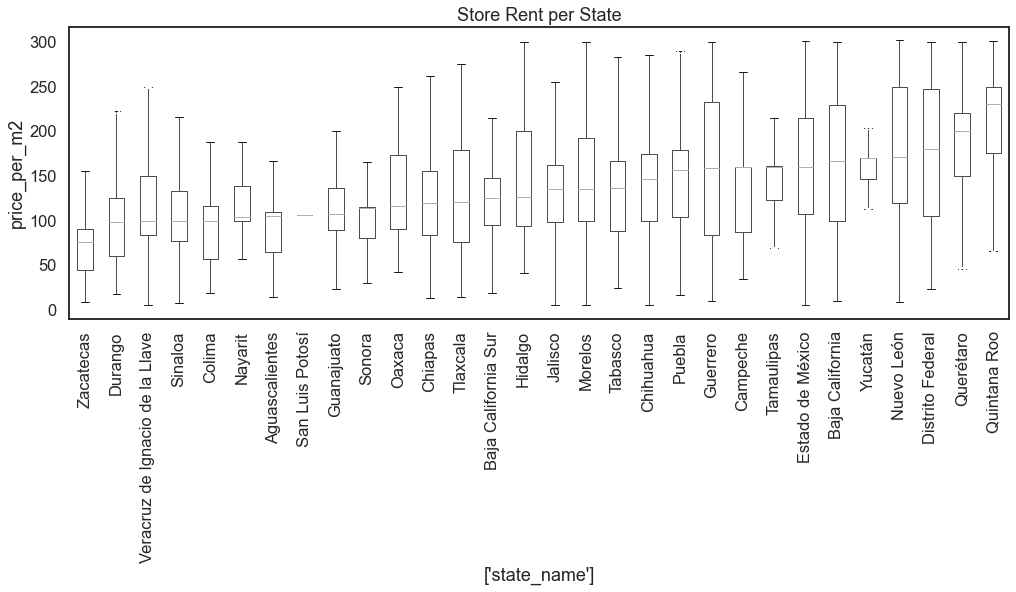

In [53]:
y= df[(df['property_type']=='store')]

def boxplot_sorted(df, by, column):
  df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df2.median().sort_values()
  ax = df2[meds.index].boxplot(rot=90,figsize=(15,5))
  plt.grid(color='w', linestyle='solid')
  ax.set_ylabel(column)
  ax.set_xlabel(by)

boxplot_sorted(y, by=["state_name"], column="price_per_m2")
plt.title('Store Rent per State')

#Conclusion: Zacatecas has the cheapest median STORE rent. Quintana Roo has the highest median STORE rent.

-----------------------------------------------------------------------------------------------------------------------------
#States/ District with most adverts
-----------------------------------------------------------------------------------------------------------------------------

In [93]:
df['state_name'].value_counts().head()

Estado de México                   33128
Veracruz de Ignacio de la Llave    32309
Querétaro                          28844
Puebla                             25945
Nuevo León                         22526
Name: state_name, dtype: int64

In [20]:
df['place_name'].value_counts().head()

Veracruz            20914
Distrito Federal    20002
Querétaro           19299
Mérida              16464
Coahuila            11351
Name: place_name, dtype: int64

<AxesSubplot:>

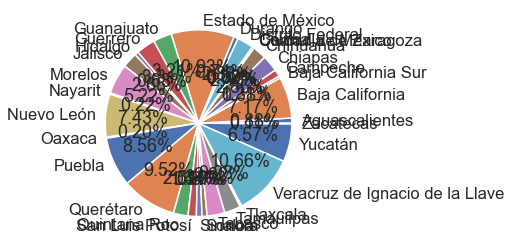

In [55]:
df.groupby('state_name').size().plot(kind='pie',ylabel='',autopct='%.2f%%')


# Conclusion:

- Veracruz and Querétaro are the companies  most important states. These are the top 2 states with the most adverts. 

-----------------------------------------------------------------------------------------------------------------------------
# Analysis by different  Property Types
-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
df['property_type'].value_counts() 

house        145306
apartment    105244
store         57860
PH               19
Name: property_type, dtype: int64

<AxesSubplot:>

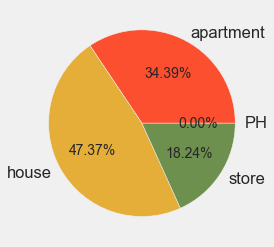

In [15]:
df.groupby('property_type').size().plot(kind='pie',ylabel='',autopct='%.2f%%')

<AxesSubplot:xlabel='property_type'>

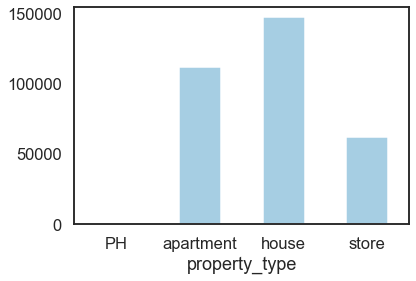

In [48]:
df.groupby('property_type').size().plot(kind='bar',rot=0,colormap='Paired')

In [50]:
print('Combined property_type Median price_per_m2: ', df['price_per_m2'].median())
print('apartment Median price_per_m2: ', df[(df['property_type']=='apartment')].price_per_m2.median())
print('house Median price_per_m2: ', df[(df['property_type']=='house')].price_per_m2.median())
print('store Median price_per_m2: ',
      df[(df['property_type']=='store')].price_per_m2.median())
print('PentHouse Median price_per_m2: ', df[(df['property_type']=='PH')].price_per_m2.median())

Combined property_type Median price_per_m2:  91.66666666666669
apartment Median price_per_m2:  127.53623188405795
house Median price_per_m2:  67.01030927835052
store Median price_per_m2:  150.0
PentHouse Median price_per_m2:  120.37037037037037


Text(0.5, 1.0, 'Property Types vs Price')

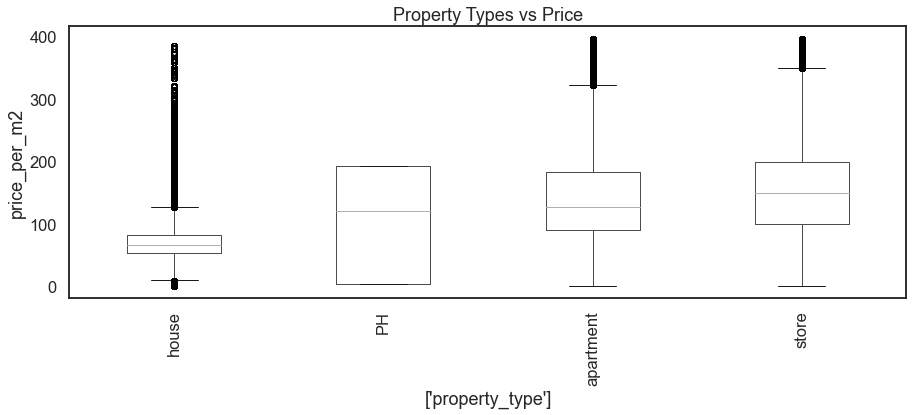

In [51]:
def boxplot_sorted(df, by, column):
  df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df2.median().sort_values()
  ax = df2[meds.index].boxplot(rot=90,figsize=(15,5))
  plt.grid(color='w', linestyle='solid')
  ax.set_ylabel(column)
  ax.set_xlabel(by)

boxplot_sorted(df, by=["property_type"], column="price_per_m2")
plt.title('Property Types vs Price')

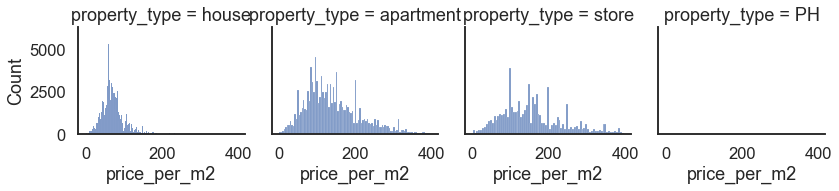

In [52]:
g = sns.FacetGrid(df, col='property_type')
g.map(sns.histplot, "price_per_m2")
plt.show()

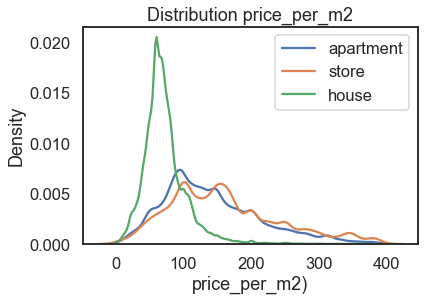

In [47]:
# KDE plot of 
sns.kdeplot(df.loc[df['property_type'] == 'apartment', 'price_per_m2'] , label = 'apartment')

# KDE plot of STORE
sns.kdeplot(df.loc[df['property_type'] == 'store', 'price_per_m2'] , label = 'store')

# KDE plot of 
sns.kdeplot(df.loc[df['property_type'] == 'house', 'price_per_m2'] , label = 'house')

# Labeling of plot
plt.xlabel('price_per_m2)'); plt.ylabel('Density'); plt.title('Distribution price_per_m2');

plt.legend(('apartment', 'store', 'house'))

#Conclusion: For ALL STATES combined

- House rent is the lowest sub-catergary clustered around 60 pesos per meter2

- Apartment and store rent have a similar distribution with long right tails.


In [ ]:
mystatsum(df,'price_per_m2')

-----------------------------------------------------------------------------------------------------------------------------
#Time Series Analysis - Monthly Median of price
-----------------------------------------------------------------------------------------------------------------------------

In [33]:
x = df.copy()
x.index = pd.to_datetime(df['created_on'])


In [34]:
# delete using a loop
columns_selected   =['created_on','lat', 'lon']
for col in x.columns:
    if col in columns_selected:
        del x[col]
print('Done')

Done


In [35]:
monthly_df= x.groupby(pd.Grouper(freq="M")).mean()
monthly_df.columns

Index(['price', 'price_aprox_local_currency', 'price_aprox_usd',
       'price_per_m2'],
      dtype='object')

Text(0.5, 1.0, 'All property_type')

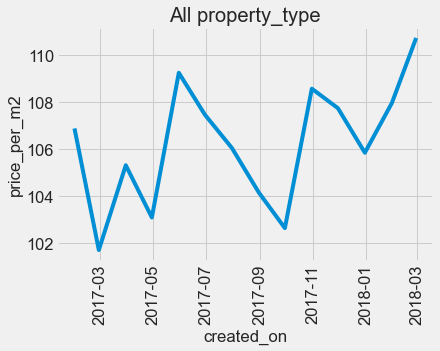

In [36]:
plt.xticks(rotation=90)
sns.lineplot(data=monthly_df,
             x='created_on',y='price_per_m2').set_title('All property_type')


Text(0.5, 1.0, 'APARTMENT property_type')

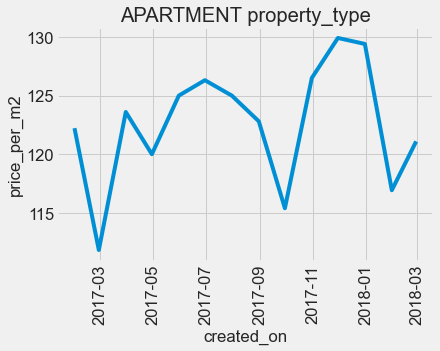

In [37]:
y= x[(x['property_type']=='apartment')]
monthly_df= y.groupby(pd.Grouper(freq="M")).median()
plt.xticks(rotation=90)
sns.lineplot(data=monthly_df, x='created_on',y='price_per_m2').set_title('APARTMENT property_type')


Text(0.5, 1.0, 'HOUSE property_type')

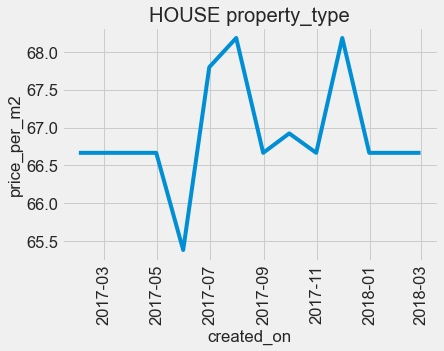

In [38]:
 y= x[(x['property_type']=='house')]
 monthly_df= y.groupby(pd.Grouper(freq="M")).median()
 plt.xticks(rotation=90)
 sns.lineplot(data=monthly_df, x='created_on',y='price_per_m2').set_title('HOUSE property_type')

Text(0.5, 1.0, 'STORE property_type')

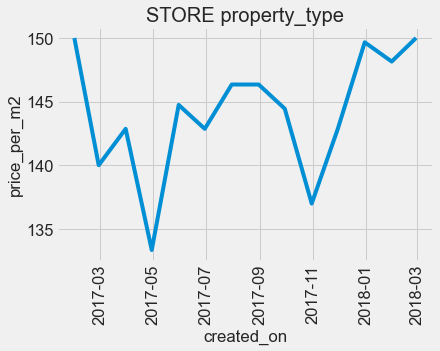

In [40]:
 y= x[(x['property_type']=='store')]
 monthly_df= y.groupby(pd.Grouper(freq="M")).median()
 plt.xticks(rotation=90)
 sns.lineplot(data=monthly_df, x='created_on',y='price_per_m2').set_title('STORE property_type')

#Conclusion:

- house price rent per meter squared has remained flat over the time period.

- other propert types (apartment,store) have increased over the time period.

-----------------------------------------------------------------------------------------------------------------------------
#Correlations
-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
corr_matrix = df.corr()
corr_matrix["price_per_m2"].sort_values(ascending=False)

price_per_m2                  1.000000
price                         0.331726
price_aprox_local_currency    0.331626
price_aprox_usd               0.329416
lat                           0.163940
lon                          -0.050787
Name: price_per_m2, dtype: float64

In [31]:
corr_matrix["price_aprox_usd"].sort_values(ascending=False)

price_aprox_usd               1.000000
price_aprox_local_currency    0.998628
price                         0.998286
price_per_m2                  0.339409
lat                           0.109116
lon                          -0.070698
Name: price_aprox_usd, dtype: float64

#Conclusion:

- price_per_meter2 is not highly correlated with the other features and is better to use.

- price_aprox_usd, price_aprox_local_currency, price exhibit high correlation and shold not be used due to colinearity.


-----------------------------------------------------------------------------------------------------------------------------
#Pickle Dataframe
-----------------------------------------------------------------------------------------------------------------------------

In [20]:
# BACKUP dataframe
#  df.to_pickle('df.pkl')

In [13]:
# RESTORE dataframe
df= pd.read_pickle('df.pkl')

In [9]:
df.columns

Index(['created_on', 'property_type', 'place_name', 'state_name', 'lat', 'lon',
       'price', 'price_aprox_local_currency', 'price_aprox_usd',
       'price_per_m2', 'district'],
      dtype='object')

-----------------------------------------------------------------------------------------------------------------------------
#Regression
-----------------------------------------------------------------------------------------------------------------------------

In [23]:
drop= [ 'created_on', 'state_name', 'lat', 'lon',
        'price', 'price_aprox_local_currency', 'price_aprox_usd']
df.drop(drop, axis='columns', inplace=True)


In [24]:
df.shape

(302987, 4)

In [25]:
m = pd.get_dummies(df['place_name'])
merged = pd.concat([df, m], axis=1)
n = pd.get_dummies(df.property_type)
merged = pd.concat([merged, n], axis=1)
o = pd.get_dummies(df['district'])
merged = pd.concat([merged, o], axis=1)

drops = [ 'place_name', 'property_type', 'district']
merged.drop(drops, inplace=True, axis=1)

In [26]:
merged.shape

(302987, 2231)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [37]:
X = merged.drop('price_per_m2', axis='columns')

In [38]:
y= merged.price_per_m2

In [30]:
model.fit(X,y)

LinearRegression()

In [31]:
model.score(X,y)

0.5485424427821088

-----------------------------------------------------------------------------------------------------------------------------
# Lognormal transformation of quantitative variable price_per_meter2
-----------------------------------------------------------------------------------------------------------------------------

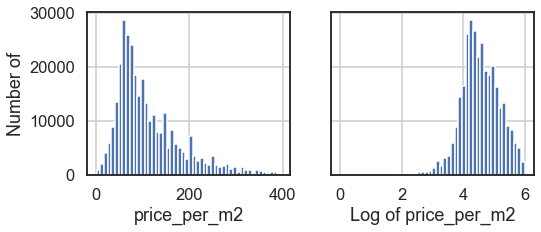

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df["price_per_m2"].hist(ax=axs[0], bins=50)
df["price_per_m2"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("price_per_m2")
axs[1].set_xlabel("Log of price_per_m2")
axs[0].set_ylabel("Number of")
plt.show()

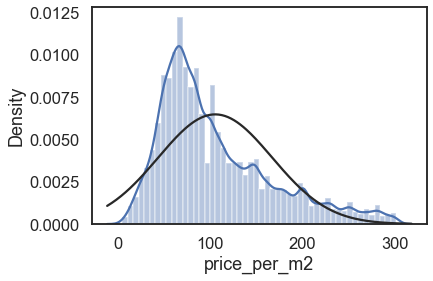

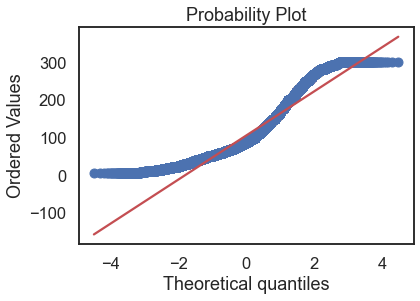

In [67]:
from scipy.stats import norm
from scipy import stat
#histogram and normal probability plot
sns.distplot(df['price_per_m2'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['price_per_m2'], plot=plt)

# price_per_m2 is not normally distributed

In [28]:
#applying log transformation
df['price_per_m2_log'] = np.log(df['price_per_m2'])

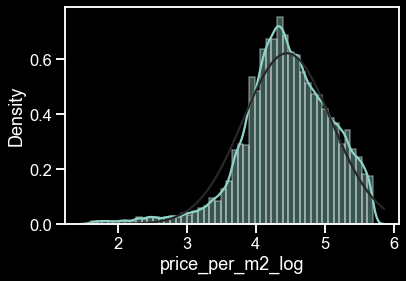

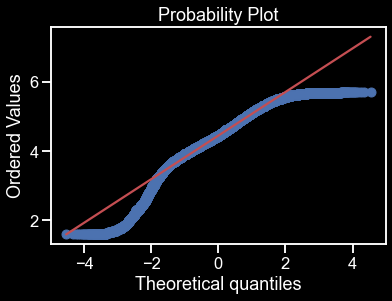

In [29]:
#transformed histogram and normal probability plot
sns.distplot(df['price_per_m2_log'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['price_per_m2_log'], plot=plt)

In [2]:
# RESTORE dataframe
df= pd.read_pickle('df.pkl')

In [ ]:
print(df.shape)
# Delete Rows not needed
index_names = df[df['property_type'] == 'store' ].index  
 # drop these row indexesfrom dataFrame
df.drop(index_names, inplace = True)
print(df.shape)
# plot_data(df,'price_per_m2')
#df['price_per_m2_log'] = np.log(df['price_per_m2'])
#plot_data(df,'price_per_m2_log')

In [31]:
 print(df.shape)
# Delete Rows not needed
index_names = df[df['property_type'] == 'house' ].index  
 # drop these row indexesfrom dataFrame
df.drop(index_names, inplace = True)
print(df.shape)

(247725, 11)
(104199, 11)


In [32]:
print(df.shape)
# Delete Rows not needed
index_names = df[df['property_type'] == 'PH' ].index  
 # drop these row indexesfrom dataFrame
df.drop(index_names, inplace = True)
print(df.shape)

(104199, 11)
(104192, 11)


In [33]:
drop= [ 'district', 'state_name', 'created_on', 'lat', 'lon',
        'price', 'price_aprox_local_currency', 'price_aprox_usd']
df.drop(drop, axis='columns', inplace=True)
print(df.shape)

(104192, 3)


In [34]:
m = pd.get_dummies(df['property_type'])
merged = pd.concat([df, m], axis=1)
o = pd.get_dummies(df['place_name'])
merged = pd.concat([merged, o], axis=1)


drops = ['property_type','place_name']
merged.drop(drops, inplace=True, axis=1)
print(merged.shape)

(104192, 857)


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
X = merged
print(X.shape)
print(X.columns)
X.drop('price_per_m2', axis='columns', inplace=True)
print(X.columns)

(104192, 857)
Index(['price_per_m2', 'apartment', 'Acacias', 'Acapulco Diamante',
       'Acapulco de Juárez', 'Acapulco de Juárez Centro', 'Acatlima',
       'Acueducto de Guadalupe', 'Adolfo Ruiz Cortines', 'Agrícola Oriental',
       ...
       'Zona Antigua Exhacienda San Agustín', 'Zona Bosques del Valle',
       'Zona Loma Larga Oriente', 'Zona Urbana Río Tijuana',
       'Zona Valle Oriente Sur', 'Zona Valle Poniente', 'Zona Valle San Ángel',
       'Zona del Valle', 'Zumpango', 'Álvaro Obregón'],
      dtype='object', length=857)
Index(['apartment', 'Acacias', 'Acapulco Diamante', 'Acapulco de Juárez',
       'Acapulco de Juárez Centro', 'Acatlima', 'Acueducto de Guadalupe',
       'Adolfo Ruiz Cortines', 'Agrícola Oriental', 'Agrícola Pantitlan',
       ...
       'Zona Antigua Exhacienda San Agustín', 'Zona Bosques del Valle',
       'Zona Loma Larga Oriente', 'Zona Urbana Río Tijuana',
       'Zona Valle Oriente Sur', 'Zona Valle Poniente', 'Zona Valle San Ángel',
       'Zo

In [37]:
y= df['price_per_m2']
print(y.shape)

(104192,)


In [38]:
model.fit(X,y)

LinearRegression()

In [39]:
model.score(X,y)

0.5237518714549572

In [258]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [259]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [260]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": -86520380828589572096.0000


In [263]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 563985282449.1089


-----------------------------------------------------------------------------------------------------------------------------
# Hypothesis t test
-----------------------------------------------------------------------------------------------------------------------------

# State Hypothesis
Ho: mu = mu_0 = 150
Ha: mu < 150 

In [2]:
def my_pvalue_t_function(data, null_hyp):
    print('...............................')
    print('Summary of sample t-test')
    print ('..............................')
    alpha = 0.05
    # number of samples 
    n = data.count() 
    #  point estimation for population mean of X
    x_bar = data.mean()
    # sample standard deviation
    s = data.std()
    print('Sample count: %s \nSample mean: %s \nstd deviation: %s' %(n,x_bar,s))
    print('Null hypothesis value:', null_hyp)
    print('Significance Alpha: ', alpha)
    t_star = stats.t.ppf(q=1-alpha, df=n-1)   # T critical value for a right-tailed test
    print('t star:', t_star)
    print('Confidence Interval:',x_bar - t_star * (s/np.sqrt(n)),x_bar + t_star * (s/np.sqrt(n)))
    t_score = (x_bar - null_hyp)/(s/np.sqrt(n))
    print('t-score: ', t_score)
    p_left = stats.t.cdf(x=t_score, df=n-1)
    p_right = 1 - p_left
    print('p-values: ONE TAIL (left tail, right tail): ', p_left, p_right)

In [12]:

y= df['price_per_m2']
y.shape

(302987,)

In [13]:
my_pvalue_t_function(y,150)

...............................
Summary of sample t-test
..............................
Sample count: 302987 
Sample mean: 106.18148309544793 
std deviation: 60.534882850165204
Null hypothesis value: 150
Significance Alpha:  0.05
t star: 1.6448586561403948
Confidence Interval: 106.00058987381328 106.36237631708258
t-score:  -398.44094863464966
p-values: ONE TAIL (left tail, right tail):  0.0 1.0


#Conclusion:

- We can reject the null hypothesis that the average rent per meter squared in mexico is 150 pesos.


-----------------------------------------------------------------------------------------------------------------------------
#Hypothesis  test
-----------------------------------------------------------------------------------------------------------------------------


Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
    Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)

    ANOVA Test result: Probability of H0 being true


In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['property_type', 'state_name']
FunctionAnova(inpData=df, 
              TargetVariable='price_per_m2', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

property_type is correlated with price_per_m2 | P-Value: 0.0
state_name is correlated with price_per_m2 | P-Value: 0.0


['property_type', 'state_name']

#Conclusion:

We can reject the null hypothesis that property_type and state_name is not correrlated with price_per_m2

These categorical variables are correlated with the Target variable price_per_m2. 

-----------------------------------------------------------------------------------------------------------------------------
# Transformation tests
-----------------------------------------------------------------------------------------------------------------------------

In [65]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import scipy.stats as stat
import pylab 
def plot_data(df,feature):
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

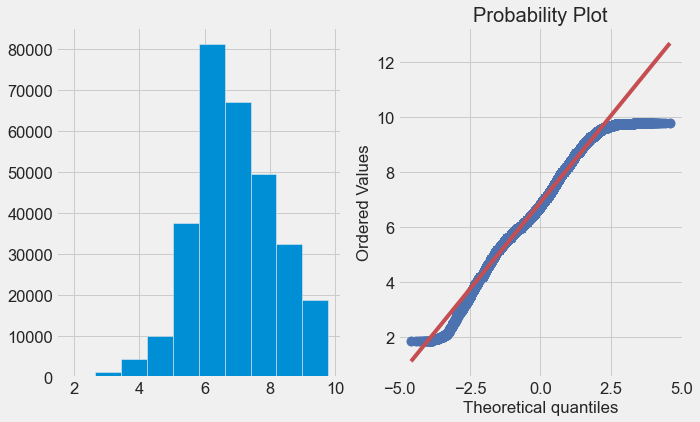

In [16]:
df['Boxcox'],parameters=stat.boxcox(df['price_per_m2'])

#df['priceperm2_reciprocal']=1/df['price_per_m2']
plot_data(df,'Boxcox')



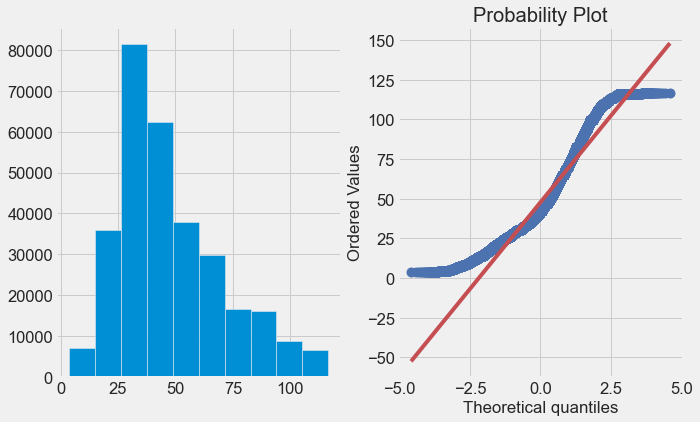

In [17]:
#### Exponential Transdormation
df['_exponential']=df.price_per_m2**(1/1.2)
plot_data(df,'_exponential')

-----------------------------------------------------------------------------------------------------------------------------
# Geo-spatial drill down analysis: country to State to Place_name  Estado de México
-----------------------------------------------------------------------------------------------------------------------------

In [3]:

df.loc[(df['state_name']=='Estado de México'), 'price_per_m2'].shape


(33128,)

(33128, 11)


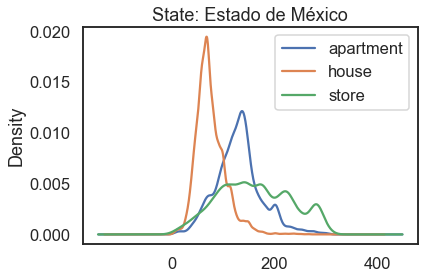

In [14]:
y= df[(df['state_name']=='Estado de México')]
print(y.shape)
y.groupby('property_type')['price_per_m2'].plot(kind='kde', legend=True)
plt.title('State: Estado de México')
plt.show()

In [11]:
y= df[(df['state_name']=='Estado de México')]
print(y.shape)

(33128, 11)


In [5]:
y['lon'].min()

-103.3616711

In [12]:
index_names = y[y['lat'] >20].index  
 # drop these row indexesfrom dataFrame
y.drop(index_names, inplace = True)
index_names = y[y['lon'] <-100].index  
 # drop these row indexesfrom dataFrame
y.drop(index_names, inplace = True)

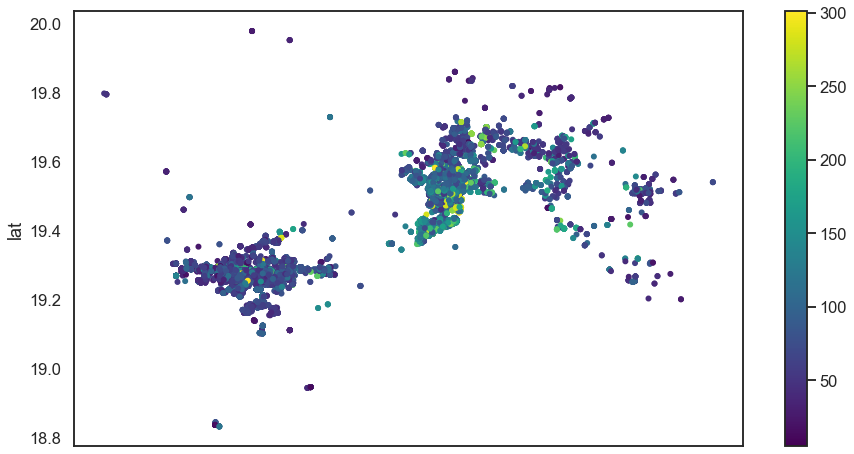

In [43]:
y.plot(kind="scatter", x="lon", y="lat",
             c=y['price_per_m2'], cmap='viridis', figsize=(15,
                                                                 8),)
plt.savefig('city.png', dpi=300)

In [17]:
y['place_name'].value_counts().head()


Metepec                 7258
Huixquilucan            4655
Toluca                  4193
Naucalpan de Juárez     3719
Atizapán de Zaragoza    2080
Name: place_name, dtype: int64

In [13]:
y1= y[(y['place_name']=='Metepec')]
print(y1.shape)

(7258, 11)


In [14]:
index_names = y1[y1['lat'] >19.3].index  
 # drop these row indexesfromx dataFrame
y1.drop(index_names, inplace = True)
index_names = y1[y1['lon'] >-99.5].index  
 # drop these row indexesfrom dataFrame
y1.drop(index_names, inplace = True)

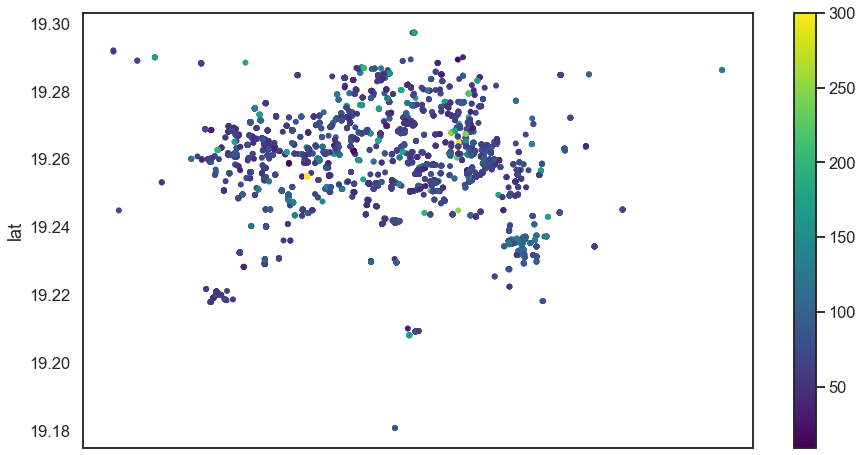

In [56]:
y1.plot(kind="scatter", x="lon", y="lat",
             c=y1['price_per_m2'], cmap='viridis', figsize=(15,
                                                                 8),)
plt.savefig('metepec.png', dpi=300)

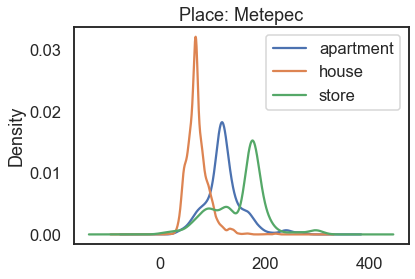

In [62]:

y1.groupby('property_type')['price_per_m2'].plot(kind='kde', legend=True)
plt.title('Place: Metepec')
plt.show()

(689, 11)


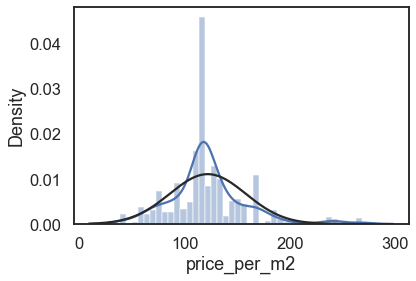

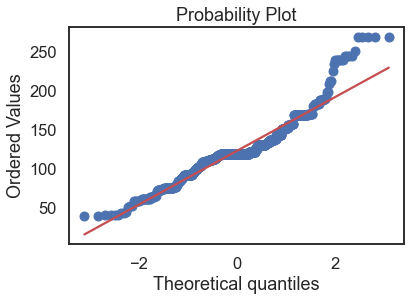

In [15]:
from scipy.stats import norm
from scipy import stats
y2= y1[(y1['property_type']=='apartment')]
print(y2.shape)
sns.distplot(y2['price_per_m2'], fit=norm)
fig = plt.figure()
res = stats.probplot(y2['price_per_m2'], plot=plt)

#Conclusion:

As we drill down into a specific place name  and property type (eg. apaetments in metepec) the data looks closer to a normal distribution than
data at the aggregated level.

Text(0.5, 1.0, 'APARTMENT property_type')

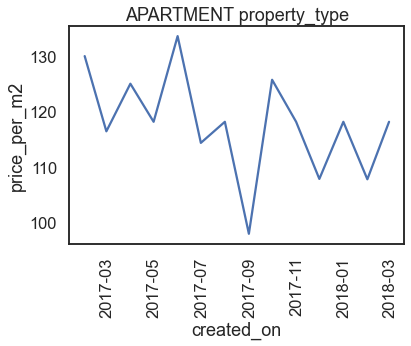

In [19]:
x = df.copy()
x.index = pd.to_datetime(df['created_on'])
y1 = x[(x['place_name']=='Metepec')]
y2= y1[(y1['property_type']=='apartment')]
monthly_df2= y2.groupby(pd.Grouper(freq="M")).median()
plt.xticks(rotation=90)
sns.lineplot(data=monthly_df2, x='created_on',y='price_per_m2').set_title('APARTMENT property_type')

#Conclusion:

Apartment prices in Metepe have been trending downwards.